In [1]:
from egraph import Drawing, all_sources_bfs
from ex_utils.config.paths import get_dataset_path
from ex_utils.share import draw_and_measure, ex_path
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
import networkx as nx
import matplotlib.pyplot as plt

EDGE_WEIGHT = 30
N_SEED = 100


export_path = ex_path.joinpath("results/images/drawing")
export_path.mkdir(parents=True, exist_ok=True)

dataset_path = get_dataset_path("USpowerGrid")
nx_graph = nx_graph_preprocessing(
    load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
)

eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
eg_distance_matrix = all_sources_bfs(eg_graph, EDGE_WEIGHT)


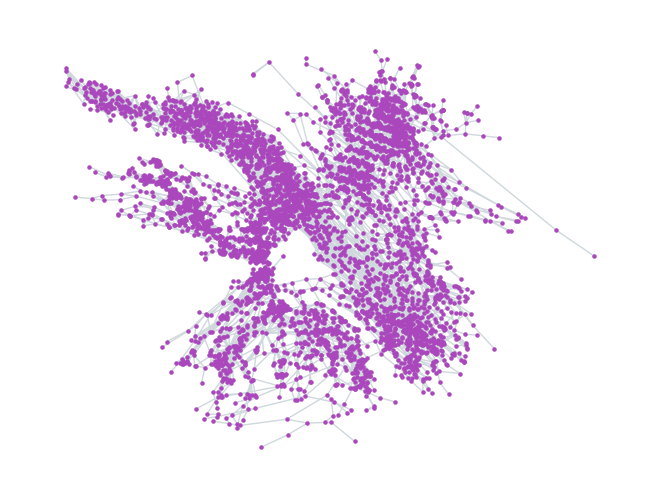

In [2]:
# ゴミHP（取得方法は忘れた）

pivots = 3
iterations = 20
eps = 1

eg_drawing = Drawing.initial_placement(eg_graph)

params, quality_metrics, pos = draw_and_measure(
    pivots=pivots,
    iterations=iterations,
    eps=eps,
    eg_graph=eg_graph,
    eg_indices=eg_indices,
    eg_drawing=eg_drawing,
    eg_distance_matrix=eg_distance_matrix,
    edge_weight=EDGE_WEIGHT,
    seed=0,
)

nx.draw(
    nx_graph, pos=pos, node_size=5, node_color="#AB47BC", edge_color="#CFD8DC"
)
plt.savefig(export_path.joinpath("USpowerGrid-bad.png"))


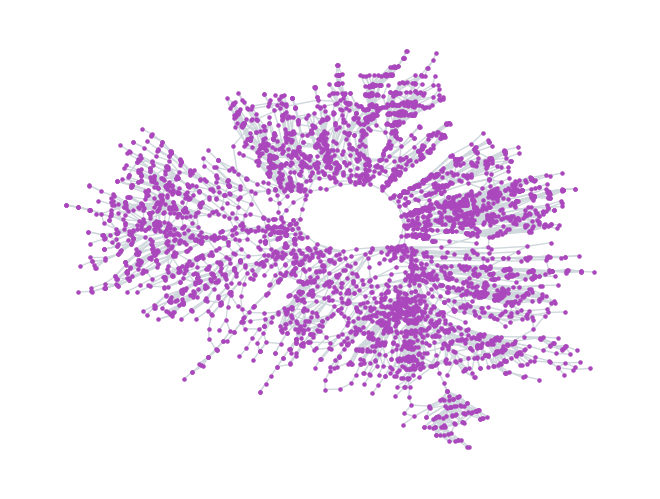

In [3]:
# 最適化済み

pivots = 99
iterations = 160
eps = 0.084249

eg_drawing = Drawing.initial_placement(eg_graph)

params, quality_metrics, pos = draw_and_measure(
    pivots=pivots,
    iterations=iterations,
    eps=eps,
    eg_graph=eg_graph,
    eg_indices=eg_indices,
    eg_drawing=eg_drawing,
    eg_distance_matrix=eg_distance_matrix,
    edge_weight=EDGE_WEIGHT,
    seed=0,
)

nx.draw(
    nx_graph, pos=pos, node_size=5, node_color="#AB47BC", edge_color="#CFD8DC"
)
plt.savefig(export_path.joinpath("USpowerGrid-pareto.png"))
